# Interpolación de lagrange y comparación de integración numerica

__Ejercicio 4:__ Implementar método de interpolación de Lagrange en `Julia`. La función deberá recibir la lista de puntos $(x_k,y_k)$ y el _lugar donde evaluamos el polinomio_, note que es particularmente útil si los _inputs_ son las listas de las $x$'s y de las $y$'s separadamente, es decir, de la misma forma en como la función `plot` recibe los argumentos; esto servira para verificar nuestros resultados. EJ.: `Interpolador(listx,listy,x).`
* Interpole las funciones $\cos(x)$, $\cos^2(x)$ tomando un arreglo de $10$ puntos distribuidos uniformemente dentro del dominio $[0,2 pi]$, donde el primer punto sea $0$ y el último $2\pi$. Grafique los puntos a interpolar y la funcion interpoladora.


Dado un conjunto de $k+1$ puntos

$$(x_0,y_0),\ldots,(x_j,y_j),\ldots,(x_k,y_k)$$

donde las $x_j$ no son iguales, la interpolación polinomial en la forma de Lagrange es una combinación lineal

$$L(x):= \sum_{j=0}^{k}y_jl_j(x)$$

de las bases polinomiales de Lagrange

$$l_j(x) = \prod_{0 \le m \le k \atop m \ne j} \frac{x-x_m}{x_j-x_m}.$$

Para cada $i \ne j$, $l_j(x)$ incluye el término $(x-x_i)$ en el numerador, entonces el producto entero será cero en $x=x_i$:

$$l_{j\ne i}(x_i) = \prod_{m \ne j} \frac{x_i-x_m}{x_j-x_m} = \frac{x_i-x_0}{x_j-x_0} \ldots \frac{x_i-x_i}{x_j-x_i} \ldots \frac{x_i-x_k}{x_j-x_k} = 0.$$

In [14]:
#Subfunción de la interpolación, parte de la multiplicatoria l
function l(j,listx,y)
    #El calor que guardará los resultados
    l=1
    for k in 1:length(listx)
        #Cumplimos la condición que sea distinto
        if k==j
        else
            #Acá la ecuación descrita para l
            a=(y-listx[k])/(listx[j]-listx[k])
            #aquí guardamos lis resultados
            l=l*a
        end
    end
    return l
end  
        ############

#Función total interpoladora L
function L(listx,listy,x)
    #guardaremos los valores en Sum
    Sum=0
    #Un pequeño analisis de las entradas de la función para parcar errores si el rango es distinto
    if length(listx)==length(listy)
        #############
        #Aquí generamos la multiplicatoria

        
        #esta es la parte de la sumatora y multiplicación de yi's con las x's evaluando a x en la función l
        for i in 1:length(listy)
            A=(listy[i])*(l(i,listx,x))
            Sum=Sum+A
        end
        return Sum
        
    else
        #Mensaje de error
        return print("las listas de entrada deben tener rangos iguales")
        
    end
end

L (generic function with 1 method)

In [19]:
#Datos de graficación

#Lista con los puntos de interpolación
listx1=linspace(0,2pi,10)

#Función cos x sobre estos puntos
listy1=cos.(listx1)

#Función cos^2(x) sobre estos puntos
listy2=zeros(length(listx1))
for i in 1:length(listx1)
    listy2[i]=cos(listx1[i])^2
end


#Datos del eje x para crear las funciones "continuas" de cos(x)
listx=linspace(-3,2pi+3,500)

#Creación del dato en "eje y" sobre la función interpoladora cos(x)
Inter_cos1=zeros(length(listx))
for i in 1:length(listx)
    Inter_cos1[i]=L(listx1,listy1,listx[i])
end


#Para eje x cosx^2
listx2=linspace(-.5,2pi+.5,500)

#Creación del dato en "eje y" sobre la función interpoladora cos(x)^2
Inter_cos2=zeros(length(listx2))
for i in 1:length(listx2)
    Inter_cos2[i]=L(listx1,listy2,listx2[i])
end

#Creación del dato en "eje y" sobre la función original cos(x)^2
cos2=zeros(length(listx2))
    for i in 1:length(listx2)
    cos2[i]=cos(listx2[i])^2
end

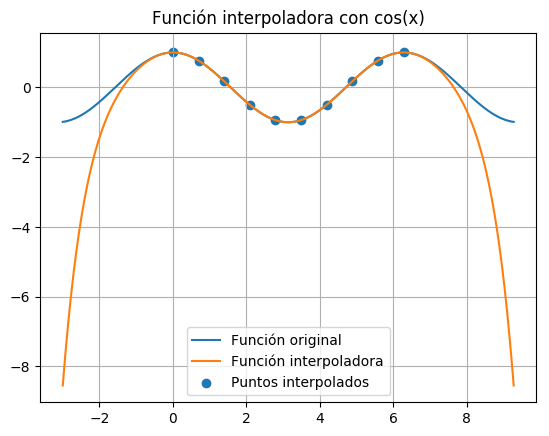

In [368]:
#Gracficación cos x
using PyPlot
plot(listx,cos.(listx),label="Función original")
plot(listx,Inter_cos1,label="Función interpoladora")
scatter(listx1,listy1,label="Puntos interpolados")
title("Función interpoladora con cos(x)")
legend()
grid("on")
show()

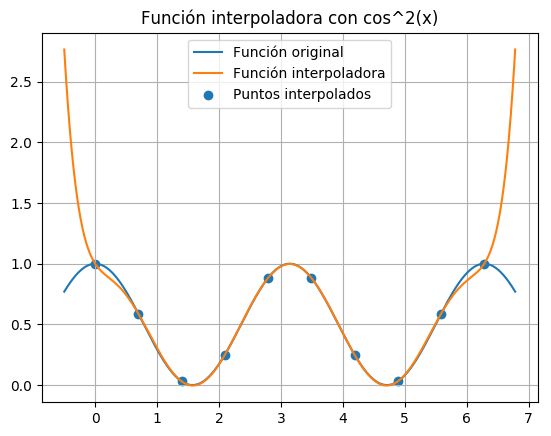

In [369]:
#Graficación cos^2 x
using PyPlot
plot(listx2,cos2,label="Función original")
plot(listx2,Inter_cos2,label="Función interpoladora")
scatter(listx1,listy2,label="Puntos interpolados")
title("Función interpoladora con cos^2(x)")
legend()
grid("on")
show()

* Interpole los los siguientes puntos: [(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)].Grafique los puntos a interpolar y la funcion interpoladora.

In [2]:
A=[0 10;2 -10;3 -4;4 0;5 5;6 20;7 -1]

7×2 Array{Int64,2}:
 0   10
 2  -10
 3   -4
 4    0
 5    5
 6   20
 7   -1

In [9]:
#Notemos que los valores de listx para interpolar, corresponden a la 1a 1a columna del vector
A[:,1]

7-element Array{Int64,1}:
 0
 2
 3
 4
 5
 6
 7

In [10]:
#Notemos que los valores de listy para interpolar, corresponden a la 1a 2a columna del vector
A[:,2]

7-element Array{Int64,1}:
  10
 -10
  -4
   0
   5
  20
  -1

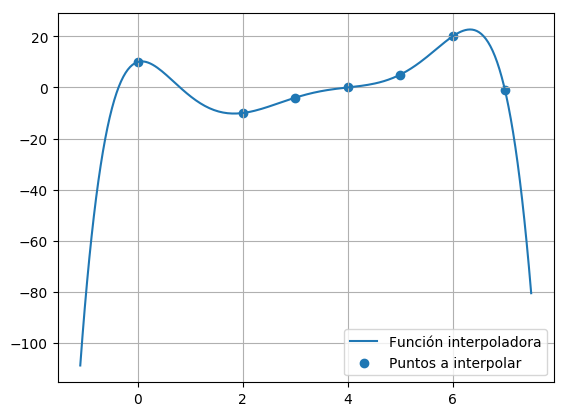

In [39]:
#Definamos datos de graficación
ejex=linspace(-1.1,7.5,200)
ejey=zeros(length(ejex))
for i in 1:length(ejex)
    ejey[i]=L(A[:,1],A[:,2],ejex[i])
end

#Pasemos a graficar
using PyPlot
scatter(A[:,1],A[:,2], label="Puntos a interpolar")
plot(ejex,ejey, label="Función interpoladora")
grid("on")
legend()
show()


* Para los ejercicios anteriores evalue la función que interpola en una variable simbólica, para que nos permita ver la forma explicita del polinomio. Ej: Interpolador(listx,listy,Sym("x")). 

In [29]:
#Para la interpolación de coseno
using SymPy
x=symbols("x")
cos1=L(listx1,listy1,x)
simplify(cos1)

                      9                        8                         7    
5.42101086242752e-20*x  - 1.97979336357609e-5*x  + 0.000497576342932821*x  - 0

                    6                        5                       4        
.00411366974807148*x  + 0.00878850466168579*x  + 0.0243778891542608*x  + 0.020

              3                      2                              
142554828432*x  - 0.512543349763748*x  + 0.00313254720748013*x + 1.0

In [30]:
#Para la interpolación de coseno cuadrado
using SymPy
x=symbols("x")
cos2=L(listx1,listy2,x)
simplify(cos2)

                      9                        8                       7      
5.42101086242752e-19*x  + 0.00125598518133148*x  - 0.0315663505495083*x  + 0.3

                6                     5                     4                 
13492883032328*x  - 1.54753813738557*x  + 3.89900431361709*x  - 4.569596087984

   3                     2                            
8*x  + 2.02232704563058*x  - 0.784017877200931*x + 1.0

In [40]:
using SymPy
x=symbols("x")
simplify(L(A[:,1],A[:,2],x))

       6        5         4         3          2            
  173*x    113*x    4957*x    2731*x    54571*x    83*x     
- ------ + ------ - ------- + ------- - -------- + ---- + 10
   2520      84       504        84       1260      14      

*****
__Ejercicio 5:__ Comparen como convergen los métodos al valor exacto de la integral, respeco al ancho de las celdas, háganlo para $f(x)=-\sin(x)$, integrando en el intervalo $[0,2\pi]$. Es decir, para los tres métodos fijen el ancho de la celda y haganla cada vez mas pequeña, grafiquen el valor de la integral contra el inverso del acho de la celda, es decir $\int f(x) dx$ contra $1/\Delta x$. Hagan esto para los tres métodos y ponganlo en una gráfica y comenten lo que observan.]

$\rightarrow$ Copiando el código de la tarea 6:

In [141]:
function Rectangulo(f::Function,a,b;intervalos=100000)
    #Graba el número de intervalos como n para menor escritura
    n=intervalos
    #Aquí se genera las particiones con el número brindado, el valor predeterminado será 100,000
    v=linspace(a,b,n)
    #Variable donde guardaremos nuestra aproximación
    Itot=0
    #Suma de todos los intervalos
    for i in 1:(n-1)
        #Condicion de este metodo
        y=(v[i]+v[i+1])/2
        I=(v[i+1]-v[i])*(f(y))
        #Recopilación de los datos calculados
        Itot+=I
    end     
    return Itot
end

function Trapecio(f::Function,a,b;intervalos=100000)
        #Graba el número de intervalos como n para menor escritura
    n=intervalos
        #Aquí se genera las particiones con el número brindado, el valor predeterminado será 100,000
    v=linspace(a,b,n)
        #Variable donde guardaremos nuestra aproximación
    Itot=0
        #Suma de todos los intervalos
    for i in 1:(n-1)
                #Condicion de este metodo
        I=(v[i+1]-v[i])*(f(v[i])+f(v[i+1]))/2 
                #Recopilación de los datos calculados
        Itot+=I
    end     
    return Itot
end

function Simpson(f::Function,a,b;intervalos=100000)
        #Graba el número de intervalos como n para menor escritura
    n=intervalos
        #Aquí se genera las particiones con el número brindado, el valor predeterminado será 100,000
    v=linspace(a,b,n)
        #Variable donde guardaremos nuestra aproximación
    Itot=0
        #Suma de todos los intervalos
    for i in 1:(n-1)
                #Condicion de este metodo
        m=(v[i+1]+v[i])/2
        I=(v[i+1]-v[i])*(f(v[i])+4*f(m)+f(v[i+1]))/6
                #Recopilación de los datos calculados
        Itot+=I
    end     
    return Itot
end
;

In [137]:
#Definiendo la función
f(x)=-sin(x)

f (generic function with 1 method)

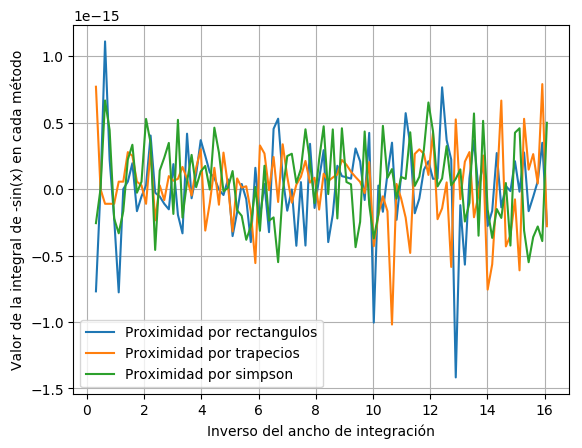

In [150]:
#Numero de puntos de la gráfica
npuntos=100
#Lugar donde se guardarán las variables
yR=zeros(npuntos)
yT=zeros(npuntos)
yS=zeros(npuntos)
ejex=zeros(npuntos)
#Recolección de datos
for i in 2:npuntos+1 #Es así por que un "2" implica que sea un sólo intervalo 
    n=i
    #Rango real de los vectores
    j=i-1
    #limites de integración
    a=0
    b=2*pi
    #Acnho por cada numero
    ancho=(b-a)/n
    inverso=1/ancho
    #Eje x
    ejex[j]=inverso
    #Ejes y's
    yR[j]=Rectangulo(f,a,b;intervalos=n)
    yT[j]=Trapecio(f,a,b;intervalos=n)
    yS[j]=Simpson(f,a,b;intervalos=n)
end

#Graficación
using SymPy
plot(ejex,yR,label="Proximidad por rectangulos")
plot(ejex,yT,label="Proximidad por trapecios")
plot(ejex,yS,label="Proximidad por simpson")
xlabel("Inverso del ancho de integración")
ylabel("Valor de la integral de -sin(x) en cada método")
grid("on")
legend()
show()

Los puntos se encuentran a una escala de $10^{-15}$, es apartir de estas 15 cifras que la aproximación comienza a bailar aún cuando se aumenten los ciclos, por tanto, ninguno de los tres converguen a un cero definitivo y esto nos produce una cota inferior con los métodos. Esto puede ser debido a la definición de la función seno en julia:

In [153]:
sin(2*pi)

-2.4492935982947064e-16

*****
```python
F F M G
```